To Predict the Price of Per Unit Area of a House based on the age ofhouse and the distamce from metro station

In [1]:
# 1.	Load the basic libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. Load the dataset

dataset = pd.read_excel("/content/Postlab Dataste.xlsx")
dataset.head()

,Age,Metro Station Distance,Price Per Unit Area
0,32.0,84.87882,37.9
1,19.5,306.59470,42.2
2,13.3,561.98450,47.3
3,13.3,561.98450,54.8
4,5.0,390.56840,43.1


In [3]:
# 3.	Analyse the dataset

dataset.describe()

,Age,Metro Station Distance,Price Per Unit Area
count,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,37.980193
std,11.392485,1262.109595,13.606488
min,0.000000,23.382840,7.600000
25%,9.025000,289.324800,27.700000
50%,16.100000,492.231300,38.450000
75%,28.150000,1454.279000,46.600000
max,43.800000,6488.021000,117.500000


In [4]:
# 4.	Normalize the data

def Feature_Normalization(X):
  X = (X - np.mean(X , axis = 0)) / np.std(X , axis = 0)
  return X , np.mean(X , axis = 0) ,  np.std(X , axis = 0)

In [5]:
# 5.	Pre-process the data

dataset_norm = dataset.values
m = len(dataset_norm[:,0])
X1 = dataset_norm[:,0].reshape(m,1)
X2 = dataset_norm[:,1].reshape(m,1)
X1_norm  , mean_x1 , std_x1 = Feature_Normalization(X1)
X2_norm  , mean_x2 , std_x2 = Feature_Normalization(X2)
Y = dataset_norm[:,-1].reshape(m,1)

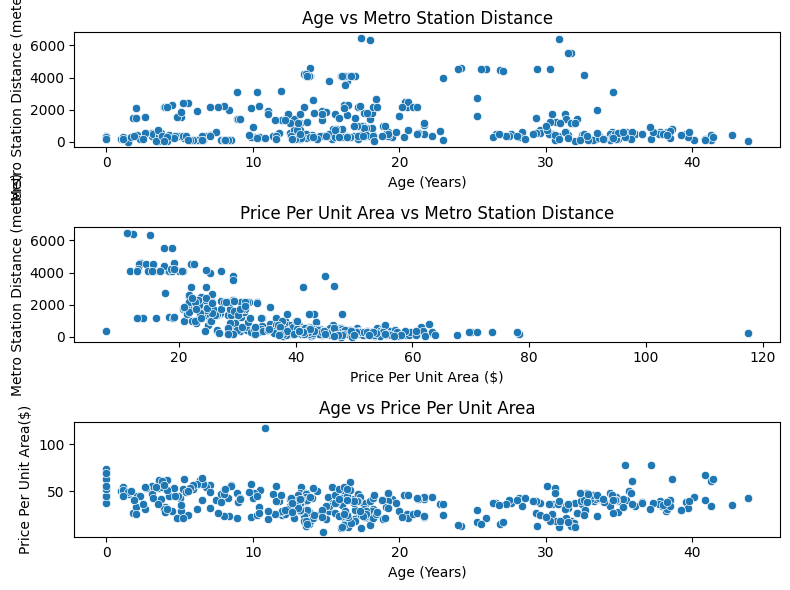

In [6]:
# 6.	Visualize the Data

plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
sns.scatterplot(x='Age', y='Metro Station Distance', data=dataset,palette='viridis')
plt.title('Age vs Metro Station Distance')
plt.xlabel('Age (Years)')
plt.ylabel('Metro Station Distance (meters)')

plt.subplot(3, 1, 2)
sns.scatterplot(x='Price Per Unit Area', y='Metro Station Distance', data=dataset,palette='viridis')
plt.title('Price Per Unit Area vs Metro Station Distance')
plt.xlabel('Price Per Unit Area ($)')
plt.ylabel('Metro Station Distance (meters)')

plt.subplot(3, 1, 3)
sns.scatterplot(x='Age', y='Price Per Unit Area', data=dataset,palette='viridis')
plt.title('Age vs Price Per Unit Area')
plt.xlabel('Age (Years)')
plt.ylabel('Price Per Unit Area($)')

plt.tight_layout()
plt.show()

In [7]:
# 7.	Separate the feature and prediction value columns

age = dataset.iloc[:,0].values
distance = dataset.iloc[:,1].values
price = dataset.iloc[:,2].values

In [8]:
# 8.	Write the Hypothesis Function

def Hypothesis(theta_array , x1 , x2) :
  return theta_array[0] + theta_array[1]*x1 + theta_array[2]*x2

In [9]:
# 9.	Write the Cost Function

def  Cost_Function(theta_array,x1,x2,y , m):
  total_cost = 0
  for i in range(m):
    total_cost += (Hypothesis(theta_array,x1[i] , x2[i]) - y[i])**2
  return total_cost/(2*m)

In [10]:
# 10.	Write the Gradient Descent optimization algorithm

def Gradient_Descent(theta_array , x1, x2, y , m ,alpha) :
  summation_0 = 0
  summation_1 = 0
  summation_2 = 0

  for i in range(m):
    summation_0 += (Hypothesis(theta_array,x1[i] , x2[i]) - y[i])
    summation_1 += ((Hypothesis(theta_array,x1[i] , x2[i]) - y[i])*x1[i])
    summation_2 += ((Hypothesis(theta_array,x1[i] , x2[i]) - y[i])*x2[i])
  new_theta0 = theta_array[0] - (alpha/m)*summation_0
  new_theta1 = theta_array[1] - (alpha/m)*summation_1
  new_theta2 = theta_array[2] - (alpha/m)*summation_2

  new_theta = [new_theta0 , new_theta1 , new_theta2]

  return new_theta

In [11]:
# 11.	Apply the training over the dataset to minimize the loss

def Training(x1, x2, y, alpha, epochs):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    theta_array = [theta_0, theta_1  ,theta_2]
    m = len(x1)
    cost_values = []

    for i in range(epochs):
        theta_array = Gradient_Descent(theta_array, x1  ,x2, y, m, alpha)
        loss = Cost_Function(theta_array, x1  ,x2, y, m)
        cost_values.append(loss)
        y_new = theta_array[0] + theta_array[1]*x1 + theta_array[2]*x2

    return theta_array , cost_values

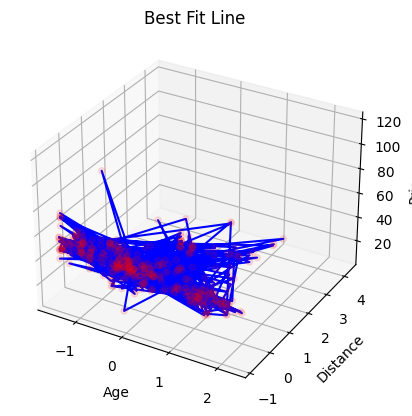

In [13]:
# 12.	Find the best fit line to the given dataset

alpha = 0.01
epochs = 500
theta_array , cost_per_itr = Training(X1_norm, X2_norm, Y, alpha, epochs)
predicred_price = theta_array[0] + theta_array[1]*X1_norm + theta_array[2]*X2_norm
ax = plt.axes(projection="3d")
ax.scatter(X1_norm, X2_norm, Y, alpha=0.1, c='#FF0000')
ax.plot(X1_norm, X2_norm, Y , c = "#0000FF")
ax.set_xlabel("Age")
ax.set_ylabel("Distance")
ax.set_zlabel("Prices")
ax.set_title("Best Fit Line")
plt.show()

Predicred Price = [37.73064502] + [-2.61911695] * Area(Normalized) + [-9.02910927]*Rooms(Normalized)


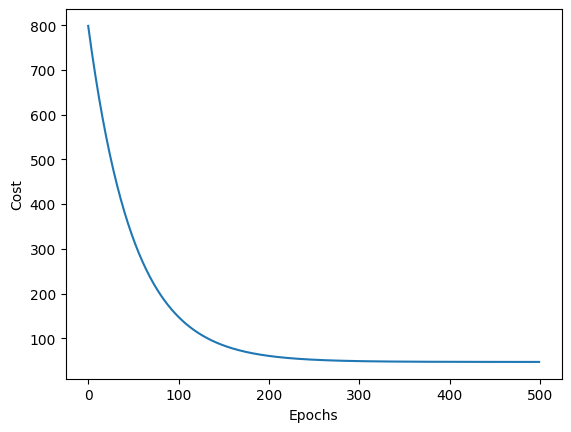

In [14]:
# 13.	Observe the cost function vs iterations learning curve

print(f"Predicred Price = {theta_array[0]} + {theta_array[1]} * Area(Normalized) + {theta_array[2]}*Rooms(Normalized)")
x = np.arange(0, epochs)
plt.plot(x, cost_per_itr)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()